## Assignment 3
### Name: Sourodeep Datta
### Roll Number: 21CS10064

Importing Necessary Libraries and Downloading Dataset

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib import pyplot as plt

In [3]:
from ucimlrepo import fetch_ucirepo

spambase = fetch_ucirepo(id=94)

X = spambase.data.features
y = spambase.data.targets

x = spambase.data.features
y = spambase.data.targets

In [4]:
X.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [5]:
X.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [6]:
y.head()

,Class
0,1
1,1
2,1
3,1
4,1


In [7]:
X = np.array(x)
y = np.array(y)
print(X.shape)
print(y.shape)

(4601, 57)
(4601, 1)


Normalizing the Dataset

In [8]:
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)

Splitting the Dataset into Training and Testing

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=218)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3680, 57)
(921, 57)
(3680, 1)
(921, 1)


### Part A

In [10]:
def accuracy(y_true, y_pred):
    return (np.sum(y_true == y_pred) / len(y_true))

def precision(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    return tp / (tp + fp)

def recall(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp / (tp + fn)

def F1(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * p * r / (p + r)

def plot_accuracy(accuracy_list, C):
    plt.figure(figsize=(8, 6))
    plt.plot(C, accuracy_list, 'ro-')
    plt.xlabel('C')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. C')
    for i, j in zip(C, accuracy_list):
        plt.annotate('(' + str(i) + ', ' + str(round(j, 3)) + ')', xy=(i, j), fontsize = 6)
    plt.show()

In [11]:
C = [0.001, 0.1, 1, 10, 100]
accuracy_list = []

for c in C:
    svm_model = SVC(C=c, kernel='linear')
    svm_model.fit(X_train, y_train[:, 0])
    y_pred = svm_model.predict(X_test)
    print('C =', c, 'Accuracy =', accuracy(y_test[:, 0], y_pred))
    print('C =', c, 'Precision =', precision(y_test[:, 0], y_pred))
    print('C =', c, 'Recall =', recall(y_test[:, 0], y_pred))
    print('C =', c, 'F1 =', F1(y_test[:, 0], y_pred))
    print()
    accuracy_list.append(accuracy(y_test[:, 0], y_pred))

C = 0.001 Accuracy = 0.8935939196525515
C = 0.001 Precision = 0.9172185430463576
C = 0.001 Recall = 0.7914285714285715
C = 0.001 F1 = 0.8496932515337423

C = 0.1 Accuracy = 0.9207383279044516
C = 0.1 Precision = 0.9085545722713865
C = 0.1 Recall = 0.88
C = 0.1 F1 = 0.8940493468795356

C = 1 Accuracy = 0.9250814332247557
C = 1 Precision = 0.9072463768115943
C = 1 Recall = 0.8942857142857142
C = 1 F1 = 0.9007194244604316

C = 10 Accuracy = 0.9250814332247557
C = 10 Precision = 0.9048991354466859
C = 10 Recall = 0.8971428571428571
C = 10 F1 = 0.9010043041606887

C = 100 Accuracy = 0.9229098805646037
C = 100 Precision = 0.9020172910662824
C = 100 Recall = 0.8942857142857142
C = 100 F1 = 0.8981348637015781



Accuracy Table

In [12]:
accuracy_table = pd.DataFrame({'C': C, 'Accuracy': accuracy_list})
accuracy_table.head()

,C,Accuracy
0,0.001,0.893594
1,0.100,0.920738
2,1.000,0.925081
3,10.000,0.925081
4,100.000,0.922910


Accuracy Plot

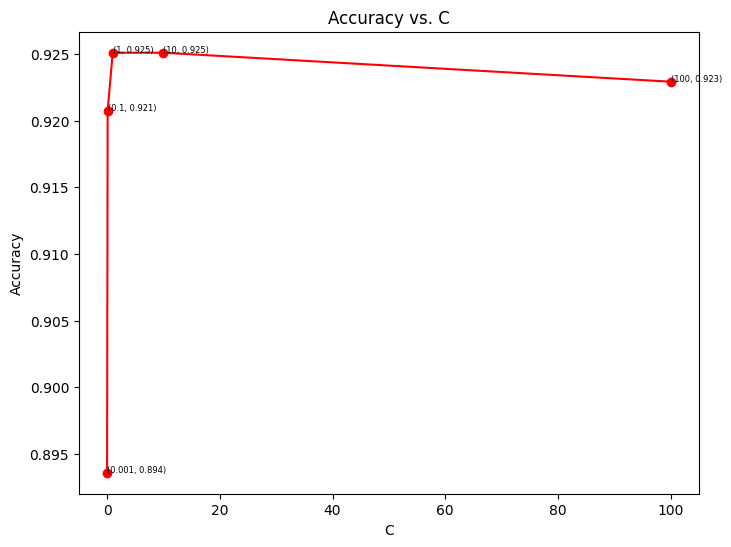

In [13]:
plot_accuracy(accuracy_list, C)

### Part B

In [14]:
C = 10
print('Setting C to', C)
print()

svm_model = SVC(C=C, kernel = 'poly', degree = 2)
svm_model.fit(X_train, y_train[:, 0])
y_pred = svm_model.predict(X_test)
print('Using polynomial kernel with degree = 2')
print('Accuracy =', accuracy(y_test[:, 0], y_pred))
print('Precision =', precision(y_test[:, 0], y_pred))
print('Recall =', recall(y_test[:, 0], y_pred))
print('F1 =', F1(y_test[:, 0], y_pred))
print()

svm_model = SVC(C=C, kernel = 'poly', degree = 3)
svm_model.fit(X_train, y_train[:, 0])
y_pred = svm_model.predict(X_test)
print('Using polynomial kernel with degree = 3')
print('Accuracy =', accuracy(y_test[:, 0], y_pred))
print('Precision =', precision(y_test[:, 0], y_pred))
print('Recall =', recall(y_test[:, 0], y_pred))
print('F1 =', F1(y_test[:, 0], y_pred))
print()

svm_model = SVC(C=C, kernel = 'sigmoid')
svm_model.fit(X_train, y_train[:, 0])
y_pred = svm_model.predict(X_test)
print('Using sigmoid kernel')
print('Accuracy =', accuracy(y_test[:, 0], y_pred))
print('Precision =', precision(y_test[:, 0], y_pred))
print('Recall =', recall(y_test[:, 0], y_pred))
print('F1 =', F1(y_test[:, 0], y_pred))
print()

svm_model = SVC(C=C, kernel = 'rbf')
svm_model.fit(X_train, y_train[:, 0])
y_pred = svm_model.predict(X_test)
print('Using rbf kernel')
print('Accuracy =', accuracy(y_test[:, 0], y_pred))
print('Precision =', precision(y_test[:, 0], y_pred))
print('Recall =', recall(y_test[:, 0], y_pred))
print('F1 =', F1(y_test[:, 0], y_pred))

Setting C to 10

Using polynomial kernel with degree = 2
Accuracy = 0.9142236699239956
Precision = 0.9093655589123867
Recall = 0.86
F1 = 0.8839941262848752

Using polynomial kernel with degree = 3
Accuracy = 0.8642779587404995
Precision = 0.9377431906614786
Recall = 0.6885714285714286
F1 = 0.7940691927512357

Using sigmoid kernel
Accuracy = 0.8653637350705755
Precision = 0.8174157303370787
Recall = 0.8314285714285714
F1 = 0.8243626062322945

Using rbf kernel
Accuracy = 0.9424538545059717
Precision = 0.9279538904899135
Recall = 0.92
F1 = 0.9239598278335724


### Part C

In [15]:
def plot_train_test_accuracy(train_accuracy, test_accuracy, C, degree):
    plt.figure(figsize=(8, 6))
    plt.plot(C, train_accuracy, 'bo-', label = 'Train Accuracy')
    plt.plot(C, test_accuracy, 'ro-', label = 'Test Accuracy')
    plt.xlabel('C')
    plt.ylabel('Accuracy')
    plt.title('Train and Test Accuracy vs. C for degree = ' + str(degree))
    for i, j in zip(C, train_accuracy):
        plt.annotate('(' + str(i) + ', ' + str(round(j, 3)) + ')', xy=(i, j), fontsize = 6)
    for i, j in zip(C, test_accuracy):
        plt.annotate('(' + str(i) + ', ' + str(round(j, 3)) + ')', xy=(i, j), fontsize = 6)
    plt.legend()
    plt.show()

In [16]:
degree = 1
C = [0.01, 100]
test_accuracy_list = []
train_accuracy_list = []

for c in C:
    svm_model = SVC(C=c, kernel='poly', degree=degree)
    svm_model.fit(X_train, y_train[:, 0])
    y_pred = svm_model.predict(X_test)
    print('C =', c, 'Accuracy =', accuracy(y_test[:, 0], y_pred))
    print('C =', c, 'Precision =', precision(y_test[:, 0], y_pred))
    print('C =', c, 'Recall =', recall(y_test[:, 0], y_pred))
    print('C =', c, 'F1 =', F1(y_test[:, 0], y_pred))
    print()
    test_accuracy_list.append(accuracy(y_test[:, 0], y_pred))
    train_accuracy_list.append(accuracy(y_train[:, 0], svm_model.predict(X_train)))

C = 0.01 Accuracy = 0.8197611292073833
C = 0.01 Precision = 0.9299065420560748
C = 0.01 Recall = 0.5685714285714286
C = 0.01 F1 = 0.7056737588652483

C = 100 Accuracy = 0.9239956568946797
C = 100 Precision = 0.9046242774566474
C = 100 Recall = 0.8942857142857142
C = 100 F1 = 0.8994252873563219



Accuracy Table

In [17]:
accuracy_table = pd.DataFrame({'C': C, 'Train Accuracy': train_accuracy_list, 'Test Accuracy': test_accuracy_list})
accuracy_table.head()

,C,Train Accuracy,Test Accuracy
0,0.01,0.808424,0.819761
1,100.00,0.936141,0.923996


Accuracy Plot for Degree 1 Polynomial Kernel

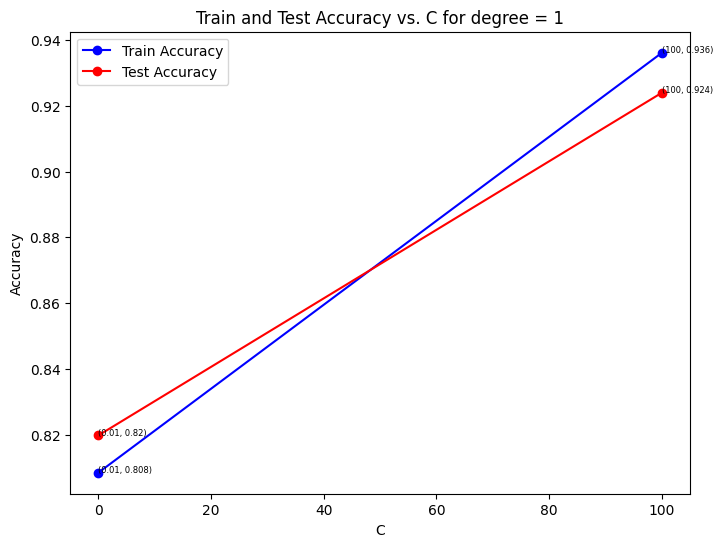

In [18]:
plot_train_test_accuracy(train_accuracy_list, test_accuracy_list, C, degree)

In [19]:
degree = 3
C = [0.01, 100]
test_accuracy_list = []
train_accuracy_list = []

for c in C:
    svm_model = SVC(C=c, kernel='poly', degree=degree)
    svm_model.fit(X_train, y_train[:, 0])
    y_pred = svm_model.predict(X_test)
    print('C =', c, 'Accuracy =', accuracy(y_test[:, 0], y_pred))
    print('C =', c, 'Precision =', precision(y_test[:, 0], y_pred))
    print('C =', c, 'Recall =', recall(y_test[:, 0], y_pred))
    print('C =', c, 'F1 =', F1(y_test[:, 0], y_pred))
    print()
    test_accuracy_list.append(accuracy(y_test[:, 0], y_pred))
    train_accuracy_list.append(accuracy(y_train[:, 0], svm_model.predict(X_train)))

C = 0.01 Accuracy = 0.6286644951140065
C = 0.01 Precision = 0.8333333333333334
C = 0.01 Recall = 0.02857142857142857
C = 0.01 F1 = 0.05524861878453038

C = 100 Accuracy = 0.9142236699239956
C = 100 Precision = 0.9385113268608414
C = 100 Recall = 0.8285714285714286
C = 100 F1 = 0.8801213960546284



Accuracy Table

In [20]:
accuracy_table = pd.DataFrame({'C': C, 'Train Accuracy': train_accuracy_list, 'Test Accuracy': test_accuracy_list})
accuracy_table.head()

,C,Train Accuracy,Test Accuracy
0,0.01,0.627989,0.628664
1,100.00,0.961957,0.914224


Accuracy Plot for Degree 3 Polynomial Kernel

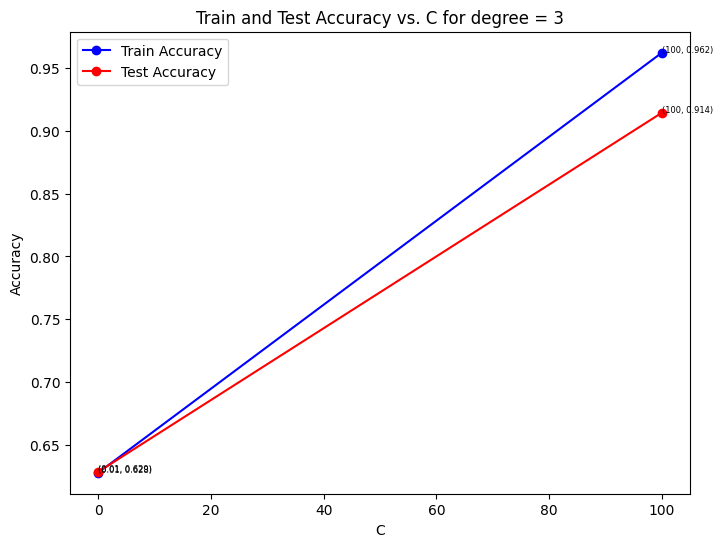

In [21]:
plot_train_test_accuracy(train_accuracy_list, test_accuracy_list, C, degree)